In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

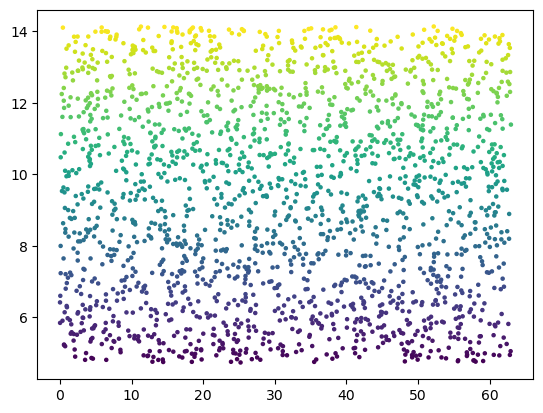

In [3]:
np.random.seed(42)
X, t = datasets.make_swiss_roll(2000)
X[:, 1] *= 3
ground_truth = np.stack([X[:, 1], t], axis=1)

plt.scatter(ground_truth[:, 0],ground_truth[:, 1], c=t,s =5, cmap = "viridis")

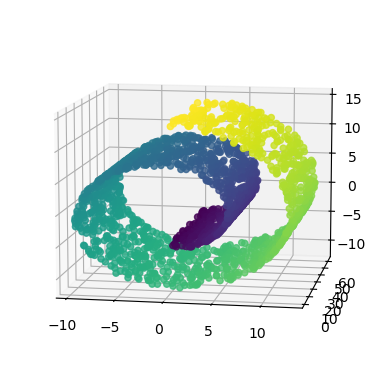

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap="viridis",  alpha=0.8)
ax.view_init(10, -80)

In [6]:
from scipy import stats,spatial

X_dists = spatial.distance.squareform(spatial.distance.pdist(ground_truth,metric = 'euclidean'))

In [7]:
def correlation(matrix_A, matrix_B):
    
    from scipy import stats
    n_samples = matrix_A.shape[0]
    pearsonr_correlation_list = []
    spearmanr_correlation_list = []
    for i in range(n_samples):
        pearsonr_res = stats.pearsonr(matrix_A[i], matrix_B[i])
        pearsonr_correlation_list.append(pearsonr_res.statistic) 
        spearmanr_res = stats.spearmanr(matrix_A[i], matrix_B[i])
        spearmanr_correlation_list.append(spearmanr_res.statistic)
        
    pearsonr_correlation_mean = np.mean(pearsonr_correlation_list)
    spearmanr_correlation_mean = np.mean(spearmanr_correlation_list)
    pearsonr_correlation_interval = stats.norm.interval(confidence=0.95, loc=pearsonr_correlation_mean, scale=stats.sem(pearsonr_correlation_list))
    spearmanr_correlation_interval = stats.norm.interval(confidence=0.95, loc=spearmanr_correlation_mean, scale=stats.sem(spearmanr_correlation_list))
    
    correlation_mean = [pearsonr_correlation_mean,spearmanr_correlation_mean]
    correlation_interval = [pearsonr_correlation_interval,spearmanr_correlation_interval]
    
    pearsonr_correlation = [pearsonr_correlation_mean,pearsonr_correlation_interval]
    spearmanr_correlation = [spearmanr_correlation_mean,spearmanr_correlation_interval]
    
    return pearsonr_correlation_list,spearmanr_correlation_list,pearsonr_correlation,spearmanr_correlation 

In [41]:
def knn_accuracy(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    return float(intersection) / len(list1)

In [39]:
def average_knn(knn_indices_1,knn_indices_2):
    list_knn_acc = []
    N = knn_indices_1.shape[0]
    for i in range(N):
        knn_acc = knn_accuracy(knn_indices_1[i],knn_indices_2[i])
        list_knn_acc.append(knn_acc)
    knn_avg = np.average(list_knn_acc)
    return knn_avg 

In [9]:
from dtne import *

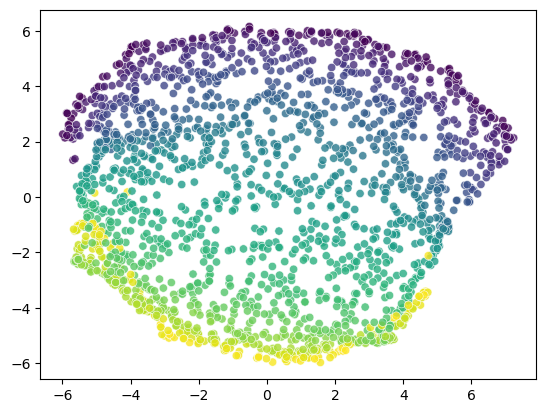

In [11]:
embedding = DTNE(k_neighbors =16)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [13]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.6399216436759482, (0.6312478730563751, 0.6485954142955213)],
 [0.6349643341266447, (0.6248233140658981, 0.6451053541873912)])

In [12]:
dists = embedding.dists
tti = manifold.trustworthiness(dists,ground_truth,n_neighbors=50)
tti

0.9640098778903612

In [35]:
nbrs = neighbors.NearestNeighbors(n_neighbors = 100, metric='euclidean').fit(ground_truth)
orig_knn_dists, orig_knn_indices = nbrs.kneighbors(ground_truth)

first_knn_indices = np.argsort(dists, axis=1)[:, :100]

In [37]:
jaccard(orig_knn_indices[0],first_knn_indices[0])

0.36054421768707484

In [42]:
ajd = average_jaccard_distance(orig_knn_indices,first_knn_indices)
ajd

0.45317

In [28]:
first_knn_indices

array([[   0, 1460,  330, ..., 1436, 1768, 1224],
       [   1, 1121, 1183, ..., 1455, 1591, 1667],
       [   2,  509,  304, ...,  991,  800, 1189],
       ...,
       [1997, 1258,  436, ...,   32, 1716,  775],
       [1998,   42, 1273, ...,  930,  866, 1764],
       [1999,  935, 1173, ..., 1596, 1436,  521]], dtype=int64)

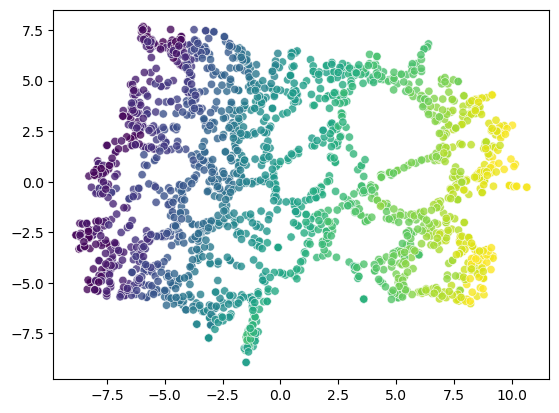

In [8]:
embedding = DTNE(k_neighbors =5)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [9]:
dists = embedding.dists

In [10]:
corr = correlation(X_dists,dists)
corr[2:]

([0.4696970328856452, (0.4642168577492174, 0.47517720802207297)],
 [0.4568458210184175, (0.45060259537983205, 0.4630890466570029)])

In [11]:
dtne_pearsonr_list = []
dtne_pearsonr_l_list = []
dtne_pearsonr_h_list = []

dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

([0.5930891037161201, (0.5863713530077375, 0.5998068544245028)],
 [0.5847403404473398, (0.5759940473563498, 0.5934866335383298)])

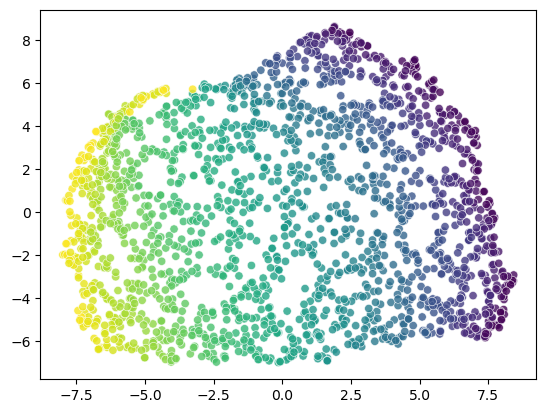

In [12]:
embedding = DTNE(k_neighbors =10)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()
dists = embedding.dists

corr = correlation(X_dists,dists)
corr[2:]

In [13]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

([0.6304082407741536, (0.6218997655435305, 0.6389167160047766)],
 [0.6262923911963478, (0.6161445703277625, 0.6364402120649332)])

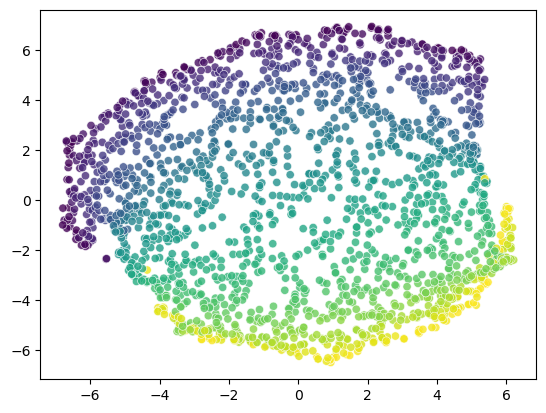

In [14]:
embedding = DTNE(k_neighbors =15)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()
dists = embedding.dists

corr = correlation(X_dists,dists)
corr[2:]

In [15]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

([0.7294788089698252, (0.722282001936001, 0.7366756160036494)],
 [0.722723149039464, (0.7149072950345304, 0.7305390030443976)])

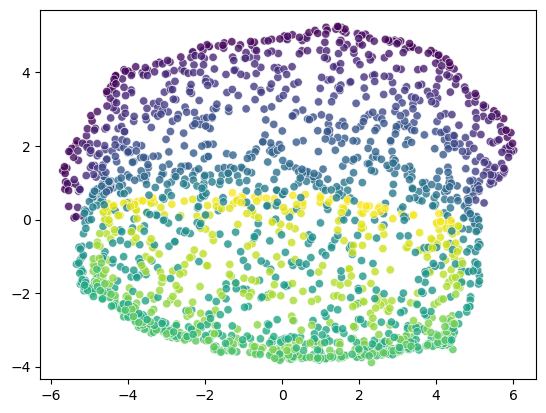

In [16]:
embedding = DTNE(k_neighbors =20)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()
dists = embedding.dists

corr = correlation(X_dists,dists)
corr[2:]

In [17]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

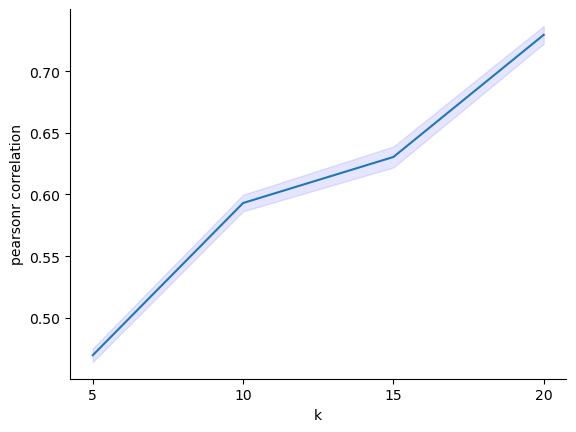

In [18]:
from matplotlib import pyplot as plt
import numpy as np

k = np.arange(5,21,5)

fig, ax = plt.subplots()

k = np.arange(5,21,5)
ax.plot(k,dtne_pearsonr_list)
ax.fill_between(k, dtne_pearsonr_l_list, dtne_pearsonr_h_list, color='b', alpha=.1)
ax.set_xticks(k)
ax.set_yticks(np.arange(0.5,0.72,0.05))
ax.set_xlabel('k')
ax.set_ylabel('pearsonr correlation')
sns.despine(top=True,right=True,left=False,bottom=False,)

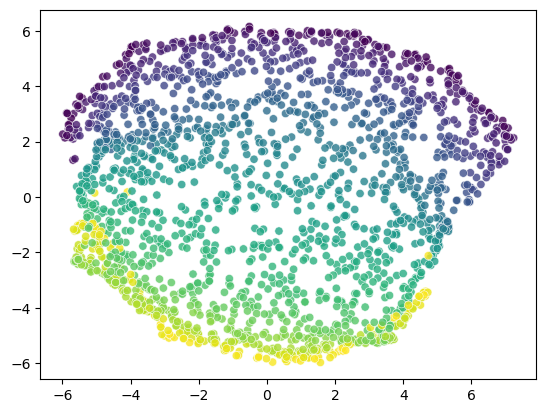

In [19]:
embedding = DTNE(k_neighbors =16,kernel = 'box')
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [20]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.6399216436759482, (0.6312478730563751, 0.6485954142955213)],
 [0.6349643341266447, (0.6248233140658981, 0.6451053541873912)])

In [21]:
dtne_pearsonr = []
dtne_pearsonr_l = []
dtne_pearsonr_h = []

dtne_pearsonr.append(corr[2][0])
dtne_pearsonr_l.append(corr[2][1][0])
dtne_pearsonr_h.append(corr[2][1][1])

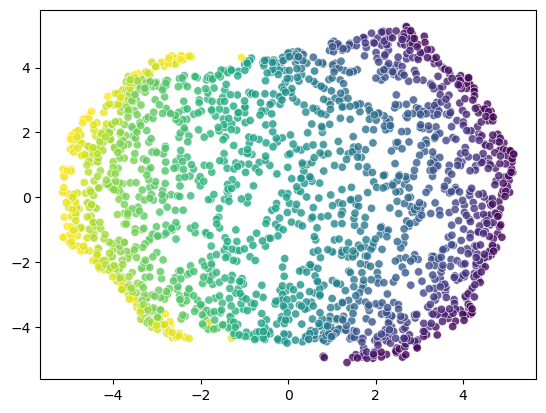

In [22]:
embedding = DTNE(k_neighbors =16,kernel = 'gauss')
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [23]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.6045790627835174, (0.59790159152584, 0.6112565340411947)],
 [0.6093333827175956, (0.5998625423669307, 0.6188042230682606)])

In [24]:
dtne_pearsonr.append(corr[2][0])
dtne_pearsonr_l.append(corr[2][1][0])
dtne_pearsonr_h.append(corr[2][1][1])

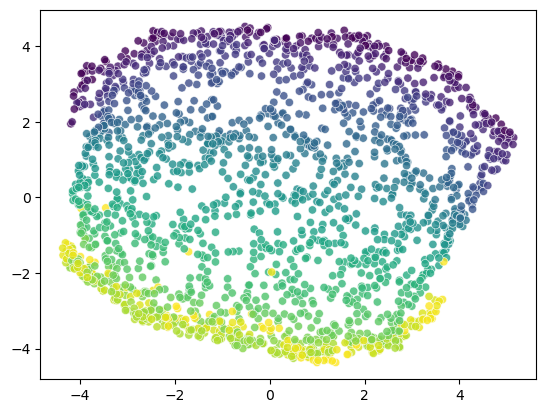

In [25]:
embedding = DTNE(k_neighbors =16,kernel = 'phate')
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [26]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.631230948289895, (0.6253752490268676, 0.6370866475529224)],
 [0.6472505793001448, (0.6390894746748575, 0.6554116839254321)])

In [27]:
dtne_pearsonr.append(corr[2][0])
dtne_pearsonr_l.append(corr[2][1][0])
dtne_pearsonr_h.append(corr[2][1][1])

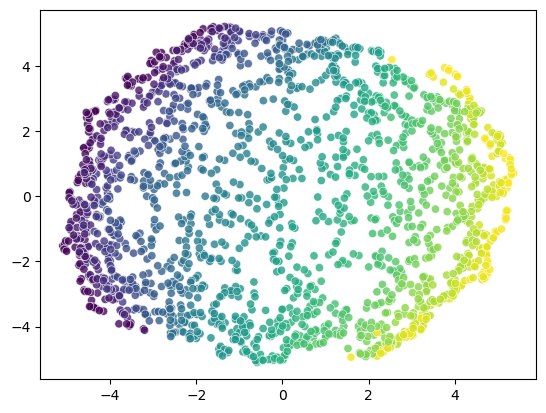

In [28]:
embedding = DTNE(k_neighbors =16,kernel = 'umap')
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [29]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.5121942632093661, (0.5096468350385909, 0.5147416913801414)],
 [0.49992834415408605, (0.49544929858513304, 0.504407389723039)])

In [30]:
dtne_pearsonr.append(corr[2][0])
dtne_pearsonr_l.append(corr[2][1][0])
dtne_pearsonr_h.append(corr[2][1][1])

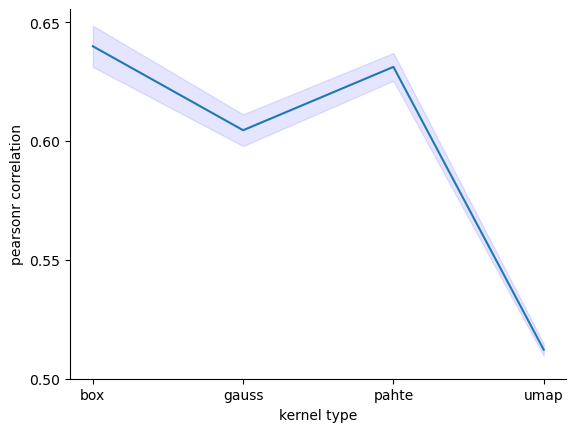

In [31]:
k = ['box','gauss','pahte','umap']

fig, ax = plt.subplots()

k = ['box','gauss','pahte','umap']
ax.plot(k,dtne_pearsonr)
ax.fill_between(k, dtne_pearsonr_l, dtne_pearsonr_h, color='b', alpha=.1)
ax.set_xticks(k)
ax.set_yticks(np.arange(0.5,0.7,0.05))
ax.set_xlabel('kernel type')
ax.set_ylabel('pearsonr correlation')
sns.despine(top=True,right=True,left=False,bottom=False,)

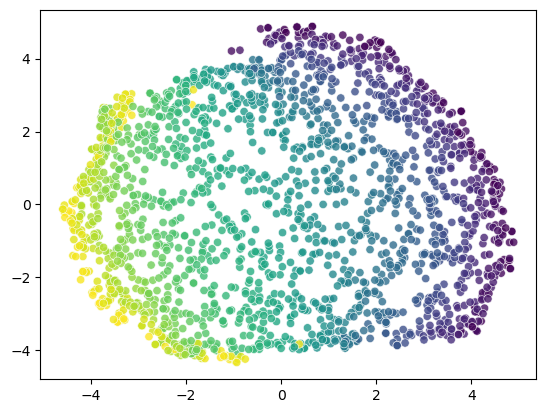

In [32]:
embedding = DTNE(k_neighbors =16,kernel = 'box',l1 = 2,)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [33]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.6158717384579161, (0.6087771094102169, 0.6229663675056153)],
 [0.6194354258916476, (0.609700019324399, 0.6291708324588962)])

In [34]:
dtne_p = []
dtne_p_l = []
dtne_p_h = []

dtne_p.append(corr[2][0])
dtne_p_l.append(corr[2][1][0])
dtne_p_h.append(corr[2][1][1])

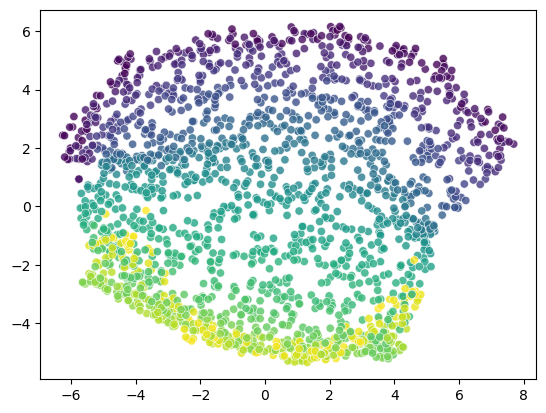

In [35]:
embedding = DTNE(k_neighbors =16,kernel = 'box',l1 = 5,)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [36]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.6434364300752575, (0.6331465752760191, 0.6537262848744959)],
 [0.6383203022553128, (0.6281493536722993, 0.6484912508383263)])

In [37]:
dtne_p.append(corr[2][0])
dtne_p_l.append(corr[2][1][0])
dtne_p_h.append(corr[2][1][1])

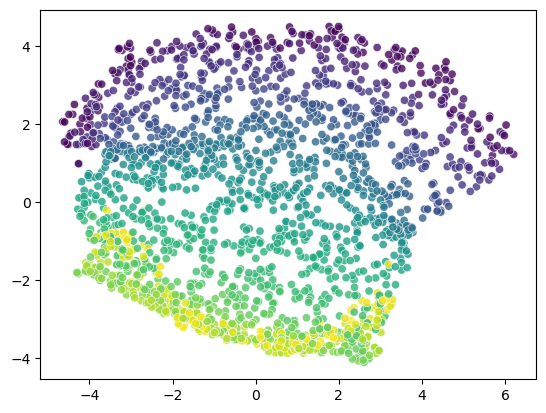

In [38]:
embedding = DTNE(k_neighbors =16,kernel = 'box',l1 = 10,)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [39]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.630238617490293, (0.6194987006029695, 0.6409785343776164)],
 [0.6343920968172674, (0.6242886972055465, 0.6444954964289883)])

In [40]:
dtne_p.append(corr[2][0])
dtne_p_l.append(corr[2][1][0])
dtne_p_h.append(corr[2][1][1])

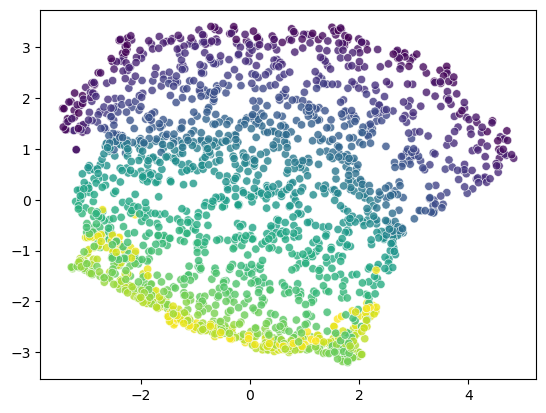

In [41]:
embedding = DTNE(k_neighbors =16,kernel = 'box',l1 = 15,)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [42]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.6204657881030338, (0.6095768221283999, 0.6313547540776676)],
 [0.6300788951825386, (0.620011766421083, 0.6401460239439941)])

In [43]:
dtne_p.append(corr[2][0])
dtne_p_l.append(corr[2][1][0])
dtne_p_h.append(corr[2][1][1])

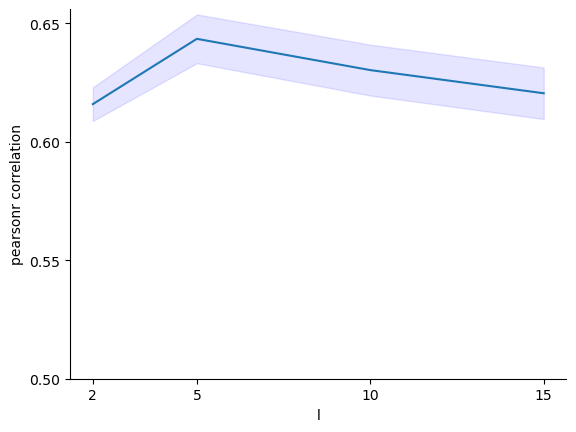

In [44]:
l = [2,5,10,15]

fig, ax = plt.subplots()
l = [2,5,10,15]
ax.plot(l,dtne_p)
ax.fill_between(l, dtne_p_l, dtne_p_h, color='b', alpha=.1)
ax.set_xticks(l)
ax.set_yticks(np.arange(0.5,0.7,0.05))
ax.set_xlabel('l')
ax.set_ylabel('pearsonr correlation')
sns.despine(top=True,right=True,left=False,bottom=False,)

In [46]:
import matplotlib.gridspec as gridspec

Text(0.5, 0, 'swiss roll dataset')

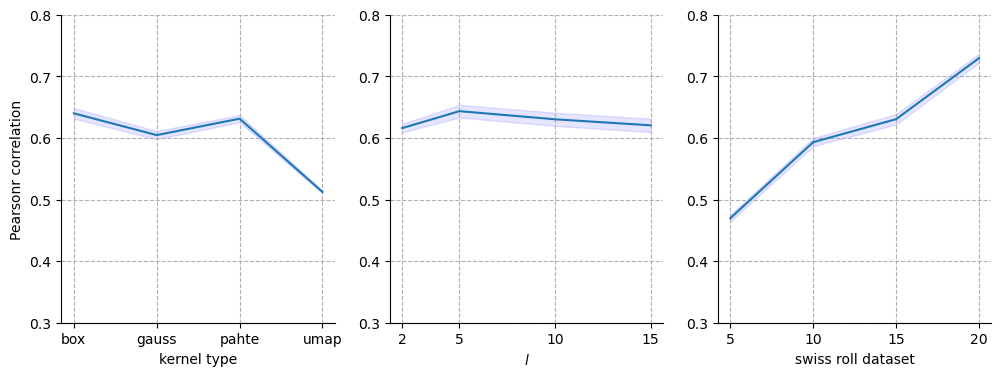

In [95]:
fig = plt.figure(figsize=(12, 4),layout="constrained")

gs1 = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])

k = ['box','gauss','pahte','umap']
ax1.plot(k,dtne_pearsonr)
ax1.fill_between(k, dtne_pearsonr_l, dtne_pearsonr_h, color='b', alpha=.1)
ax1.set_xticks(k)
ax1.set_yticks(np.arange(0.3,0.81,0.1))
ax1.set_xlabel('kernel type')
ax1.set_ylabel('Pearsonr correlation')
ax1.grid(linestyle="dashed", )
sns.despine(top=True,right=True,left=False,bottom=False,)

l = [2,5,10,15]
ax2.plot(l,dtne_p)
ax2.fill_between(l, dtne_p_l, dtne_p_h, color='b', alpha=.1)
ax2.set_xticks(l)
ax2.set_yticks(np.arange(0.3,0.81,0.1))
ax2.set_xlabel('$l$')
ax2.grid(linestyle="dashed", )
sns.despine(top=True,right=True,left=False,bottom=False,)

k = np.arange(5,21,5)
ax3.plot(k,dtne_pearsonr_list)
ax3.fill_between(k, dtne_pearsonr_l_list, dtne_pearsonr_h_list, color='b', alpha=.1)
ax3.set_xticks(k)
ax3.set_yticks(np.arange(0.3,0.81,0.1))
ax3.set_xlabel('$k$')
# ax3.set_ylabel('pearsonr correlation')
sns.despine(top=True,right=True,left=False,bottom=False,)
ax3.grid(linestyle="dashed", )

plt.xlabel("swiss roll dataset")
# plt.savefig('./sc_swiss_roll.png', format='png', dpi=1000)
# plt.savefig('./sc_swiss_roll.pdf', format='pdf', dpi=1000)

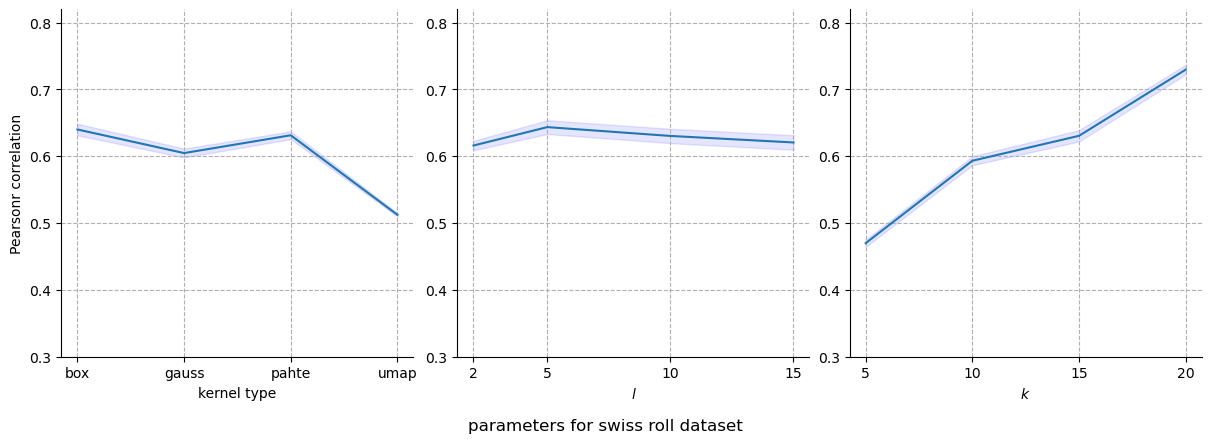

In [130]:
fig, axes = plt.subplots(1, 3,  figsize=(12,4),constrained_layout=True,
                        ) # sharex=True, sharey=True,


ax1 = fig.add_subplot(axes[0])
ax2 = fig.add_subplot(axes[1])
ax3 = fig.add_subplot(axes[2])

k = ['box','gauss','pahte','umap']
ax1.plot(k,dtne_pearsonr)
ax1.fill_between(k, dtne_pearsonr_l, dtne_pearsonr_h, color='b', alpha=.1)
ax1.set_xticks(k)
ax1.set_yticks(np.arange(0.3,0.82,0.1))
ax1.set_ylim([0.3,0.82])
ax1.set_xlabel('kernel type')
ax1.set_ylabel('Pearsonr correlation')
ax1.grid(linestyle="dashed", )
sns.despine(top=True,right=True,left=False,bottom=False,)

l = [2,5,10,15]
ax2.plot(l,dtne_p)
ax2.fill_between(l, dtne_p_l, dtne_p_h, color='b', alpha=.1)
ax2.set_xticks(l)
ax2.set_yticks(np.arange(0.3,0.82,0.1))
ax2.set_ylim([0.3,0.82])
ax2.set_xlabel('$l$')
ax2.grid(linestyle="dashed", )
sns.despine(top=True,right=True,left=False,bottom=False,)

k = np.arange(5,21,5)
ax3.plot(k,dtne_pearsonr_list)
ax3.fill_between(k, dtne_pearsonr_l_list, dtne_pearsonr_h_list, color='b', alpha=.1)
ax3.set_xticks(k)
ax3.set_yticks(np.arange(0.3,0.82,0.1))
ax3.set_ylim([0.3,0.82])
ax3.set_xlabel('$k$')
# ax3.set_ylabel('pearsonr correlation')
sns.despine(top=True,right=True,left=False,bottom=False,)
ax3.grid(linestyle="dashed", )

# hide tick and tick label of the big axis
fig.supxlabel('parameters for swiss roll dataset',y=-0.07)
# plt.xlabel("swiss roll dataset")
plt.savefig('./sc_swiss_roll2.png', format='png', bbox_inches='tight',dpi=1000)
plt.savefig('./sc_swiss_roll2.pdf', format='pdf',bbox_inches='tight', dpi=1000)

In [31]:
dists = embedding.dists
corr = correlation(X_dists,dists)
corr[2:]

([0.6097970326605434, (0.6015989945882219, 0.617995070732865)],
 [0.6048131746343675, (0.5951376913300249, 0.61448865793871)])

In [ ]:
embedding = DTNE(k_neighbors =16,kernel = 'box')
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

([0.8132570262435775, (0.8076592337431779, 0.8188548187439771)],
 [0.7939230535971004, (0.7879029525232996, 0.7999431546709012)])

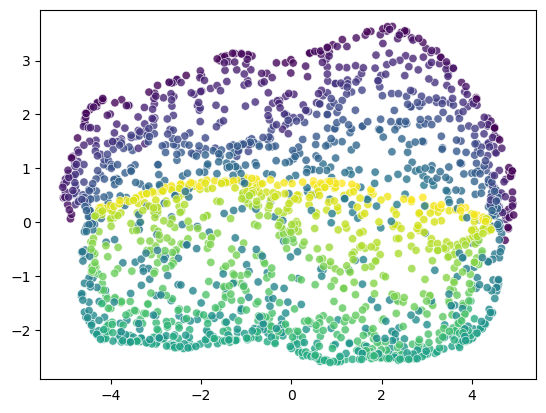

In [18]:
embedding = DTNE(k_neighbors =25)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()
dists = embedding.dists

corr = correlation(X_dists,dists)
corr[2:]

In [19]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

([0.8576883772483002, (0.8529931814656975, 0.8623835730309029)],
 [0.8309496031341758, (0.8259579758177845, 0.835941230450567)])

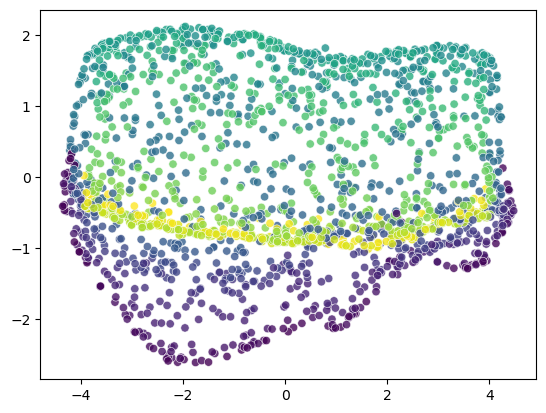

In [20]:
embedding = DTNE(k_neighbors =30)
Y = embedding.fit_transform(X)

sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()
dists = embedding.dists

corr = correlation(X_dists,dists)
corr[2:]

In [21]:
dtne_pearsonr_list.append(corr[2][0])
dtne_pearsonr_l_list.append(corr[2][1][0])
dtne_pearsonr_h_list.append(corr[2][1][1])

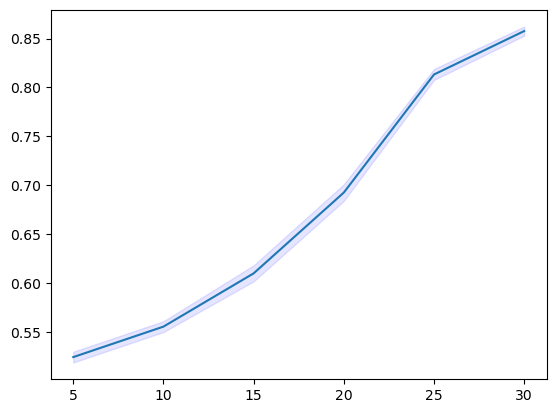

In [22]:
from matplotlib import pyplot as plt
import numpy as np

k = np.arange(5,31,5)

fig, ax = plt.subplots()
ax.plot(k,dtne_pearsonr_list)
ax.fill_between(k, dtne_pearsonr_l_list, dtne_pearsonr_h_list, color='b', alpha=.1)